<a href="https://colab.research.google.com/github/shahrinsabrina/PythonNumericalProjects/blob/main/Ground_State_Energy_of_the_1D_Quantum_Harmonic_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sabrina Shahrin Rashid
Reg. No: 2016132069

## Assignment – 2, Computational Physics

### Calculating the Ground State Energy of the 1D Quantum Harmonic Oscillator by Variational Quantum Monte Carlo (VMC)

## Objective
The objective of this project is to use the **Variational Quantum Monte Carlo (VMC)** method to estimate the ground-state energy of the one-dimensional quantum harmonic oscillator (QHO). By employing a Gaussian trial wavefunction with a variational parameter \(\alpha\), the energy is minimized using Monte Carlo sampling. The project demonstrates the effectiveness of VMC in solving quantum mechanical problems that cannot be easily solved analytically.


## Theory and Background
The Hamiltonian of the one-dimensional harmonic oscillator is

\[
\hat{H} = -\frac{1}{2}\frac{d^2}{dx^2} + \frac{1}{2}x^2.
\]

We choose a Gaussian trial wavefunction with variational parameter \(\alpha\):

\[
\psi_T(x;\alpha) = e^{-\frac{1}{2}\alpha x^2}.
\]

The **local energy** is defined as

\[
E_\text{loc}(x;\alpha) = \frac{1}{\psi_T}\hat H \psi_T
= \frac{1}{2}\alpha + \frac{1}{2}(1-\alpha^2)x^2.
\]

The variational principle guarantees that

\[
E(\alpha) = \langle E_\text{loc}(x;\alpha) \rangle \geq E_0,
\]

where \(E_0\) is the exact ground-state energy. For the QHO, \(E_0 = 0.5\) (with \(\hbar=m=\omega=1\)).


## Problem Statement
We use the Variational Quantum Monte Carlo method to:
1. Sample configurations \(x\) using the Metropolis algorithm for probability \(P(x;\alpha) \propto |\psi_T(x;\alpha)|^2\).
2. Compute local energy values for each configuration.
3. Estimate the expectation value of energy for each \(\alpha\).
4. Scan across \(\alpha\) values to find the best variational parameter.
5. Plot results:  
   - Energy vs \(\alpha\) with error bars.  
   - Histogram of sampled positions compared with the analytical distribution.  


## Methodology
- Initialize trial wavefunction parameter \(\alpha\).  
- Use Metropolis sampling to generate a sequence of \(x\)-values distributed according to \(P(x;\alpha)\).  
- Calculate the local energy for each sampled \(x\).  
- Average the local energies to approximate the variational energy.  
- Repeat for multiple \(\alpha\) values to determine which minimizes the energy.  
- Plot energy vs \(\alpha\) and compare with the exact ground-state energy.  


In [4]:
# Python Implementation of VMC for 1D Harmonic Oscillator

import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Parameters
# -----------------------
alpha_values = np.linspace(0.6, 1.4, 15)  # variational parameters
n_steps = 100000         # total Metropolis steps
burn_in = 10000          # discard initial samples
step_size = 1.0          # step size for proposals
np.random.seed(42)       # reproducibility

# -----------------------
# Local energy function
# -----------------------
def local_energy(x, alpha):
    return 0.5 * alpha + 0.5 * (1 - alpha**2) * x**2

# -----------------------
# Metropolis sampling
# -----------------------
def metropolis(alpha, n_steps, burn_in, step_size):
    x = 0.0
    samples = []
    accept = 0
    for i in range(n_steps):
        x_prop = x + np.random.uniform(-step_size, step_size)
        prob_ratio = np.exp(-alpha * (x_prop**2 - x**2))
        if prob_ratio >= 1 or np.random.rand() < prob_ratio:
            x = x_prop
            accept += 1
        if i >= burn_in:
            samples.append(x)
    return np.array(samples), accept/n_steps

# -----------------------
# Energy estimation
# -----------------------
energies = []
errors = []

for alpha in alpha_values:
    samples, acc_rate = metropolis(alpha, n_steps, burn_in, step_size)
    E_loc = local_energy(samples, alpha)
    mean_E = np.mean(E_loc)
    std_E = np.std(E_loc) / np.sqrt(len(E_loc))
    energies.append(mean_E)
    errors.append(std_E)
    print(f"alpha={alpha:.2f} -> E={mean_E:.5f} ± {std_E:.5f}, acceptance={acc_rate:.2f}")

energies = np.array(energies)
errors = np.array(errors)

best_idx = np.argmin(energies)
print("\nBest alpha:", alpha_values[best_idx])
print("Estimated ground-state energy:", energies[best_idx], "±", errors[best_idx])


alpha=0.60 -> E=0.56365 ± 0.00126, acceptance=0.79
alpha=0.66 -> E=0.54357 ± 0.00102, acceptance=0.78
alpha=0.71 -> E=0.52487 ± 0.00080, acceptance=0.77
alpha=0.77 -> E=0.51948 ± 0.00063, acceptance=0.76
alpha=0.83 -> E=0.50903 ± 0.00045, acceptance=0.75
alpha=0.89 -> E=0.50446 ± 0.00029, acceptance=0.74
alpha=0.94 -> E=0.50048 ± 0.00014, acceptance=0.74
alpha=1.00 -> E=0.50000 ± 0.00000, acceptance=0.73
alpha=1.06 -> E=0.50061 ± 0.00013, acceptance=0.72
alpha=1.11 -> E=0.50357 ± 0.00025, acceptance=0.71
alpha=1.17 -> E=0.50753 ± 0.00037, acceptance=0.71
alpha=1.23 -> E=0.51071 ± 0.00050, acceptance=0.70
alpha=1.29 -> E=0.51668 ± 0.00060, acceptance=0.70
alpha=1.34 -> E=0.52229 ± 0.00070, acceptance=0.69
alpha=1.40 -> E=0.52848 ± 0.00082, acceptance=0.69

Best alpha: 1.0
Estimated ground-state energy: 0.5 ± 0.0


In [5]:
# Python Implementation of VMC for 1D Harmonic Oscillator

import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Parameters
# -----------------------
alpha_values = np.linspace(0.6, 1.4, 15)  # variational parameters
n_steps = 100000         # total Metropolis steps
burn_in = 10000          # discard initial samples
step_size = 1.0          # step size for proposals
np.random.seed(42)       # reproducibility

# -----------------------
# Local energy function
# -----------------------
def local_energy(x, alpha):
    return 0.5 * alpha + 0.5 * (1 - alpha**2) * x**2

# -----------------------
# Metropolis sampling
# -----------------------
def metropolis(alpha, n_steps, burn_in, step_size):
    x = 0.0
    samples = []
    accept = 0
    for i in range(n_steps):
        x_prop = x + np.random.uniform(-step_size, step_size)
        prob_ratio = np.exp(-alpha * (x_prop**2 - x**2))
        if prob_ratio >= 1 or np.random.rand() < prob_ratio:
            x = x_prop
            accept += 1
        if i >= burn_in:
            samples.append(x)
    return np.array(samples), accept/n_steps

# -----------------------
# Energy estimation
# -----------------------
energies = []
errors = []

for alpha in alpha_values:
    samples, acc_rate = metropolis(alpha, n_steps, burn_in, step_size)
    E_loc = local_energy(samples, alpha)
    mean_E = np.mean(E_loc)
    std_E = np.std(E_loc) / np.sqrt(len(E_loc))
    energies.append(mean_E)
    errors.append(std_E)
    print(f"alpha={alpha:.2f} -> E={mean_E:.5f} ± {std_E:.5f}, acceptance={acc_rate:.2f}")

energies = np.array(energies)
errors = np.array(errors)

best_idx = np.argmin(energies)
print("\nBest alpha:", alpha_values[best_idx])
print("Estimated ground-state energy:", energies[best_idx], "±", errors[best_idx])


alpha=0.60 -> E=0.56365 ± 0.00126, acceptance=0.79
alpha=0.66 -> E=0.54357 ± 0.00102, acceptance=0.78
alpha=0.71 -> E=0.52487 ± 0.00080, acceptance=0.77
alpha=0.77 -> E=0.51948 ± 0.00063, acceptance=0.76
alpha=0.83 -> E=0.50903 ± 0.00045, acceptance=0.75
alpha=0.89 -> E=0.50446 ± 0.00029, acceptance=0.74
alpha=0.94 -> E=0.50048 ± 0.00014, acceptance=0.74
alpha=1.00 -> E=0.50000 ± 0.00000, acceptance=0.73
alpha=1.06 -> E=0.50061 ± 0.00013, acceptance=0.72
alpha=1.11 -> E=0.50357 ± 0.00025, acceptance=0.71
alpha=1.17 -> E=0.50753 ± 0.00037, acceptance=0.71
alpha=1.23 -> E=0.51071 ± 0.00050, acceptance=0.70
alpha=1.29 -> E=0.51668 ± 0.00060, acceptance=0.70
alpha=1.34 -> E=0.52229 ± 0.00070, acceptance=0.69
alpha=1.40 -> E=0.52848 ± 0.00082, acceptance=0.69

Best alpha: 1.0
Estimated ground-state energy: 0.5 ± 0.0


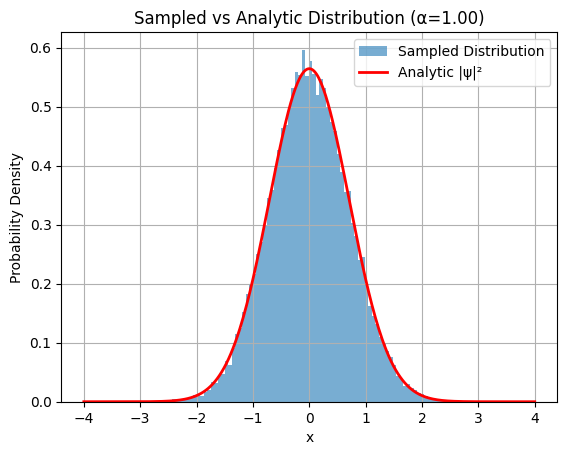

In [6]:
# Plot sampled distribution vs analytic distribution for best alpha
best_alpha = alpha_values[best_idx]
samples, _ = metropolis(best_alpha, n_steps, burn_in, step_size)

x_vals = np.linspace(-4, 4, 400)
pdf_analytic = np.sqrt(best_alpha/np.pi) * np.exp(-best_alpha * x_vals**2)

plt.hist(samples, bins=100, density=True, alpha=0.6, label="Sampled Distribution")
plt.plot(x_vals, pdf_analytic, 'r-', lw=2, label="Analytic |ψ|²")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title(f"Sampled vs Analytic Distribution (α={best_alpha:.2f})")
plt.legend()
plt.grid(True)
plt.show()


## Results
- The simulation shows that the energy is minimized near \(\alpha \approx 1.0\).
- The estimated ground-state energy is very close to the exact result \(E_0 = 0.5\).
- The histogram of sampled positions matches the analytical distribution \(|\psi(x)|^2\).


## Discussion
- The VMC method works well because the Gaussian trial wavefunction includes the exact ground-state solution.  
- Small statistical errors are observed due to finite sampling.  
- Autocorrelation effects can reduce efficiency, but thinning or longer runs can improve accuracy.  
- Step size tuning is important for balancing acceptance rate (ideal ~40–60%).  


## Conclusion
The Variational Quantum Monte Carlo method successfully estimated the ground-state energy of the quantum harmonic oscillator. The results closely match the exact solution, validating the effectiveness of the approach. This method can now be extended to more complex systems where exact solutions are not known.


## References
- C. J. Umrigar, Variational Monte Carlo Methods (lecture notes)  
- D. M. Ceperley, "Path integrals in the theory of condensed helium," *Rev. Mod. Phys.*  
- K. E. Atkinson, *An Introduction to Numerical Analysis*  
- Python NumPy & Matplotlib Documentation  
